In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [2]:
file_path = "raw_data/Q_75_previous-1950-2023_RR-T-Vent.csv.gz"

# Read the CSV file
df_2023 = pd.read_csv(file_path, compression="gzip", sep=";")

# Display first few rows
df_2023.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,75101001,INNOCENTS,48.860667,2.348333,37,19500101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75101001,INNOCENTS,48.860667,2.348333,37,19500102,1.8,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75101001,INNOCENTS,48.860667,2.348333,37,19500103,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75101001,INNOCENTS,48.860667,2.348333,37,19500104,0.2,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75101001,INNOCENTS,48.860667,2.348333,37,19500105,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_2023.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493916 entries, 0 to 493915
Data columns (total 58 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NUM_POSTE  493916 non-null  int64  
 1   NOM_USUEL  493916 non-null  object 
 2   LAT        493916 non-null  float64
 3   LON        493916 non-null  float64
 4   ALTI       493916 non-null  int64  
 5   AAAAMMJJ   493916 non-null  int64  
 6   RR         480320 non-null  float64
 7   QRR        480513 non-null  float64
 8   TN         132788 non-null  float64
 9   QTN        133076 non-null  float64
 10  HTN        47519 non-null   float64
 11  QHTN       48148 non-null   float64
 12  TX         132933 non-null  float64
 13  QTX        133222 non-null  float64
 14  HTX        47534 non-null   float64
 15  QHTX       48046 non-null   float64
 16  TM         60328 non-null   float64
 17  QTM        60338 non-null   float64
 18  TNTXM      132156 non-null  float64
 19  QTNTXM     132239 non-n

In [3]:
df_2023["NOM_USUEL"].nunique()


37

In [4]:
df_2023['NOM_USUEL'].unique()


array(['INNOCENTS', 'TOUR ST-JACQUES', 'PLANTES', 'LUXEMBOURG', 'LAENNEC',
       'CHAMP DE MARS', 'TOUR EIFFEL', 'LOUIS XVI', 'LARIBOISIERE',
       'ST-LOUIS', 'ILE DE BERCY', 'LA FAISANDERIE', 'LEO LAGRANGE',
       'ST-ANTOINE', "PORTE D'IVRY", 'SALPETRIERE', 'PARIS-MONTSOURIS',
       'OBSERVATOIRE', 'OBS. TERRASSE', 'PARIS-MONTSOURIS-DOUBLE',
       'VAUGIRARD', 'G. POMPIDOU', 'AUTEUIL', 'BAGATELLE', 'PASSY',
       'LONGCHAMP', 'BATIGNOLLES', 'MONTMARTRE', 'BUTTES CHAUMONT',
       'VILLETTE', 'HEROLD', 'BUTTES RESERV.', 'CHARONNE',
       'MENIL.RESERVOIR', 'BELLEVILLE', 'TENON', 'BELLEVILLE PARC'],
      dtype=object)

In [5]:
df_2023['date'] = pd.to_datetime(df_2023['AAAAMMJJ'], format='%Y%m%d')

In [6]:
df_2023_paris = df_2023[df_2023['NOM_USUEL'] == 'PARIS-MONTSOURIS']
df_2023_paris.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
247253,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500101,0.0,1.0,-1.7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-01
247254,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500102,1.7,1.0,-3.8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-02
247255,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500103,2.4,1.0,3.1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-03
247256,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500104,1.1,1.0,8.3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-04
247257,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500105,2.0,1.0,6.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-05


In [7]:
df_2023_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 247253 to 274280
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   NUM_POSTE  27028 non-null  int64         
 1   NOM_USUEL  27028 non-null  object        
 2   LAT        27028 non-null  float64       
 3   LON        27028 non-null  float64       
 4   ALTI       27028 non-null  int64         
 5   AAAAMMJJ   27028 non-null  int64         
 6   RR         27028 non-null  float64       
 7   QRR        27028 non-null  float64       
 8   TN         27028 non-null  float64       
 9   QTN        27028 non-null  float64       
 10  HTN        14607 non-null  float64       
 11  QHTN       14611 non-null  float64       
 12  TX         27028 non-null  float64       
 13  QTX        27028 non-null  float64       
 14  HTX        14609 non-null  float64       
 15  QHTX       14610 non-null  float64       
 16  TM         27028 non-null  float64

In [8]:
df_2010_paris = df_2023_paris[df_2023_paris['date'] >= '2010-01-01']
df_2010_paris.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
269168,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100101,0.0,1.0,0.2,1.0,...,NaN,12.2,1.0,NaN,NaN,1610.0,9.0,45.0,9.0,2010-01-01
269169,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100102,0.0,1.0,-1.2,1.0,...,NaN,8.6,1.0,NaN,NaN,1250.0,9.0,7.0,9.0,2010-01-02
269170,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100103,0.0,1.0,-1.3,1.0,...,NaN,8.2,1.0,NaN,NaN,1935.0,9.0,0.0,9.0,2010-01-03
269171,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100104,0.0,1.0,-6.0,1.0,...,NaN,7.8,1.0,NaN,NaN,41.0,9.0,0.0,9.0,2010-01-04
269172,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100105,0.0,1.0,-3.7,1.0,...,NaN,4.8,1.0,NaN,NaN,1610.0,9.0,0.0,9.0,2010-01-05


In [9]:
# List of selected necessary columns for LSTM model
necessary_columns = [
     'AAAAMMJJ',
     'TN', 'TX', 'TM', 'TNTXM', 'TAMPLI', 'TNSOL',
     'date',"RR"
]

# Selecting the columns from your DataFrame
df_2010_paris = df_2010_paris[necessary_columns]

# Display the first few rows to verify
df_2010_paris.head()


,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date,RR
269168,20100101,0.2,1.5,0.9,0.9,1.3,-0.4,2010-01-01,0.0
269169,20100102,-1.2,3.6,1.0,1.2,4.8,-4.2,2010-01-02,0.0
269170,20100103,-1.3,4.7,0.2,1.7,6.0,-4.1,2010-01-03,0.0
269171,20100104,-6.0,-1.1,-3.6,-3.6,4.9,-7.6,2010-01-04,0.0
269172,20100105,-3.7,0.4,-2.2,-1.7,4.1,-6.3,2010-01-05,0.0


In [10]:
df_2010_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5113 entries, 269168 to 274280
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  5113 non-null   int64         
 1   TN        5113 non-null   float64       
 2   TX        5113 non-null   float64       
 3   TM        5113 non-null   float64       
 4   TNTXM     5113 non-null   float64       
 5   TAMPLI    5113 non-null   float64       
 6   TNSOL     5109 non-null   float64       
 7   date      5113 non-null   datetime64[ns]
 8   RR        5113 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 399.5 KB


In [11]:
file_path = "raw_data/Q_75_latest-2024-2025_RR-T-Vent.csv.gz"

# Read the CSV file
df_2024 = pd.read_csv(file_path, compression="gzip", sep=";")

# Display first few rows
df_2024.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,75106001,LUXEMBOURG,48.844667,2.333833,46,20240101,9.6,1.0,6.8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,20240102,7.1,1.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,20240103,3.2,1.0,10.4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,20240104,0.2,1.0,8.3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,20240105,0.2,1.0,6.7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_2024['date'] = pd.to_datetime(df_2024['AAAAMMJJ'], format='%Y%m%d')

In [13]:
df_2024_paris = df_2024[df_2024['NOM_USUEL'] == 'PARIS-MONTSOURIS']
df_2024_paris.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
1362,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240101,10.7,1.0,6.1,1.0,...,NaN,15.4,1.0,NaN,NaN,2253.0,9.0,647.0,9.0,2024-01-01
1363,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240102,8.0,1.0,9.0,1.0,...,NaN,21.9,1.0,NaN,NaN,1415.0,9.0,692.0,9.0,2024-01-02
1364,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240103,4.4,1.0,10.1,1.0,...,NaN,18.8,1.0,NaN,NaN,1310.0,9.0,265.0,9.0,2024-01-03
1365,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240104,0.0,1.0,7.5,1.0,...,NaN,13.6,1.0,NaN,NaN,2100.0,9.0,18.0,9.0,2024-01-04
1366,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240105,0.0,1.0,6.1,1.0,...,NaN,16.9,1.0,NaN,NaN,118.0,9.0,39.0,9.0,2024-01-05


In [14]:
necessary_columns = [
     'AAAAMMJJ',
     'TN', 'TX', 'TM', 'TNTXM', 'TAMPLI', 'TNSOL',
     'date',"RR"
]

# Selecting the columns from your DataFrame
df_2024_paris = df_2024_paris[necessary_columns]

# Display the first few rows to verify
df_2024_paris.head()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date,RR
1362,20240101,6.1,11.1,8.4,8.6,5.0,4.0,2024-01-01,10.7
1363,20240102,9.0,12.1,11.0,10.6,3.1,8.0,2024-01-02,8.0
1364,20240103,10.1,12.7,10.6,11.4,2.6,7.8,2024-01-03,4.4
1365,20240104,7.5,11.1,9.7,9.3,3.6,5.0,2024-01-04,0.0
1366,20240105,6.1,9.7,7.6,7.9,3.6,3.0,2024-01-05,0.0


In [15]:
df_2024_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 1362 to 1815
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  454 non-null    int64         
 1   TN        454 non-null    float64       
 2   TX        454 non-null    float64       
 3   TM        454 non-null    float64       
 4   TNTXM     454 non-null    float64       
 5   TAMPLI    454 non-null    float64       
 6   TNSOL     454 non-null    float64       
 7   date      454 non-null    datetime64[ns]
 8   RR        454 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 35.5 KB


In [17]:
df_2024_paris = df_2024_paris[df_2024_paris['date'] < '2025-01-01']

In [18]:
df_2024_paris.tail()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date,RR
1723,20241227,1.9,8.0,3.9,5.0,6.1,-2.5,2024-12-27,0.0
1724,20241228,-1.1,1.6,0.1,0.3,2.7,-1.3,2024-12-28,0.0
1725,20241229,0.6,5.0,3.4,2.8,4.4,0.6,2024-12-29,0.0
1726,20241230,1.4,4.2,2.9,2.8,2.8,1.5,2024-12-30,0.0
1727,20241231,1.1,5.2,3.7,3.2,4.1,1.0,2024-12-31,0.0


In [19]:
df_combined_paris = pd.concat([df_2010_paris, df_2024_paris], ignore_index=True)

In [20]:
df_combined_paris.head()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date,RR
0,20100101,0.2,1.5,0.9,0.9,1.3,-0.4,2010-01-01,0.0
1,20100102,-1.2,3.6,1.0,1.2,4.8,-4.2,2010-01-02,0.0
2,20100103,-1.3,4.7,0.2,1.7,6.0,-4.1,2010-01-03,0.0
3,20100104,-6.0,-1.1,-3.6,-3.6,4.9,-7.6,2010-01-04,0.0
4,20100105,-3.7,0.4,-2.2,-1.7,4.1,-6.3,2010-01-05,0.0


In [21]:
df_combined_paris.tail()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date,RR
5474,20241227,1.9,8.0,3.9,5.0,6.1,-2.5,2024-12-27,0.0
5475,20241228,-1.1,1.6,0.1,0.3,2.7,-1.3,2024-12-28,0.0
5476,20241229,0.6,5.0,3.4,2.8,4.4,0.6,2024-12-29,0.0
5477,20241230,1.4,4.2,2.9,2.8,2.8,1.5,2024-12-30,0.0
5478,20241231,1.1,5.2,3.7,3.2,4.1,1.0,2024-12-31,0.0


In [22]:
df_combined_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  5479 non-null   int64         
 1   TN        5479 non-null   float64       
 2   TX        5479 non-null   float64       
 3   TM        5479 non-null   float64       
 4   TNTXM     5479 non-null   float64       
 5   TAMPLI    5479 non-null   float64       
 6   TNSOL     5475 non-null   float64       
 7   date      5479 non-null   datetime64[ns]
 8   RR        5479 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 385.4 KB


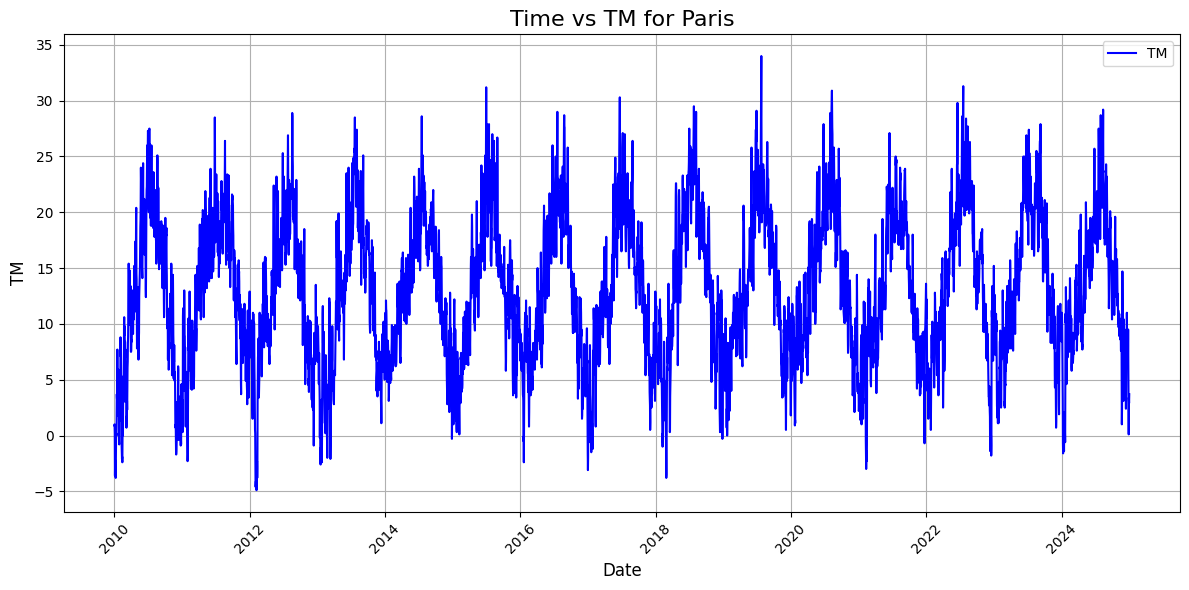

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined_paris['date'], df_combined_paris['TM'], color='blue', label='TM')
plt.title('Time vs TM for Paris', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('TM', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
df_combined_paris['TNSOL'].fillna(df_combined_paris['TNSOL'].median(), inplace=True)


In [25]:
df_combined_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  5479 non-null   int64         
 1   TN        5479 non-null   float64       
 2   TX        5479 non-null   float64       
 3   TM        5479 non-null   float64       
 4   TNTXM     5479 non-null   float64       
 5   TAMPLI    5479 non-null   float64       
 6   TNSOL     5479 non-null   float64       
 7   date      5479 non-null   datetime64[ns]
 8   RR        5479 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 385.4 KB


In [26]:
df = df_combined_paris

In [27]:
import pickle

# Assuming 'df' is your DataFrame
pickle_file_path = 'raw_data/df_paris.pkl'

# Save the DataFrame as a pickle file
df.to_pickle(pickle_file_path)

# Check if it's saved correctly
print(f"Data saved as pickle file at: {pickle_file_path}")


Data saved as pickle file at: raw_data/df_paris.pkl


In [28]:
pickle_file_path = 'raw_data/df_paris.pkl'

# Load the DataFrame from the pickle file
df = pd.read_pickle(pickle_file_path)

In [29]:
df.head()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date,RR
0,20100101,0.2,1.5,0.9,0.9,1.3,-0.4,2010-01-01,0.0
1,20100102,-1.2,3.6,1.0,1.2,4.8,-4.2,2010-01-02,0.0
2,20100103,-1.3,4.7,0.2,1.7,6.0,-4.1,2010-01-03,0.0
3,20100104,-6.0,-1.1,-3.6,-3.6,4.9,-7.6,2010-01-04,0.0
4,20100105,-3.7,0.4,-2.2,-1.7,4.1,-6.3,2010-01-05,0.0


In [30]:
df_paris=df.copy()

In [ ]:
df_paris.dtypes

AAAAMMJJ             int64
TN                 float64
TX                 float64
TM                 float64
TNTXM              float64
TAMPLI             float64
TNSOL              float64
date        datetime64[ns]
RR                 float64
dtype: object

In [44]:
df_paris['date'] = pd.to_datetime(df_paris['date'])
df_paris.set_index('date', inplace=True)

In [50]:
df_paris.tail()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,RR
date,,,,,,,,
2024-12-27,20241227,1.9,8.0,3.9,5.0,6.1,-2.5,0.0
2024-12-28,20241228,-1.1,1.6,0.1,0.3,2.7,-1.3,0.0
2024-12-29,20241229,0.6,5.0,3.4,2.8,4.4,0.6,0.0
2024-12-30,20241230,1.4,4.2,2.9,2.8,2.8,1.5,0.0
2024-12-31,20241231,1.1,5.2,3.7,3.2,4.1,1.0,0.0


In [46]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['TM'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -4.621630641926157
p-value: 0.00011781699555471332


/home/akarimzadeh/.pyenv/versions/3.10.6/envs/climate_change_project/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


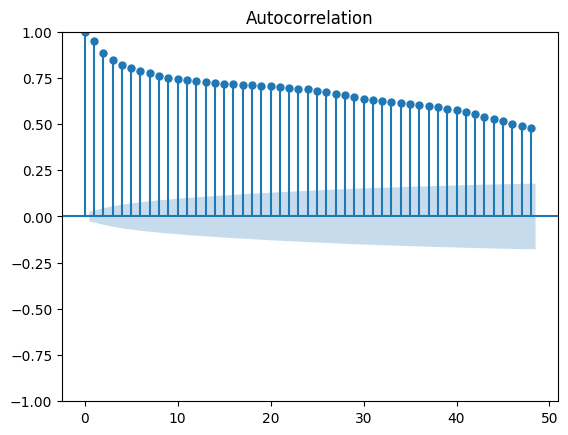

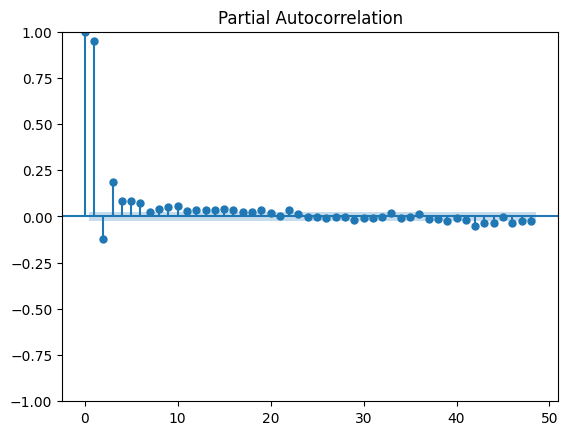

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['TM'], lags=48)  # Plot for one year
plot_pacf(df['TM'], lags=48)
plt.show()

/tmp/ipykernel_7837/1258306936.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=year_avg, x='year', y='TM_ma_3y', label='3Y Moving Average', ax=ax, ci=None, color='red', linewidth=2.5)


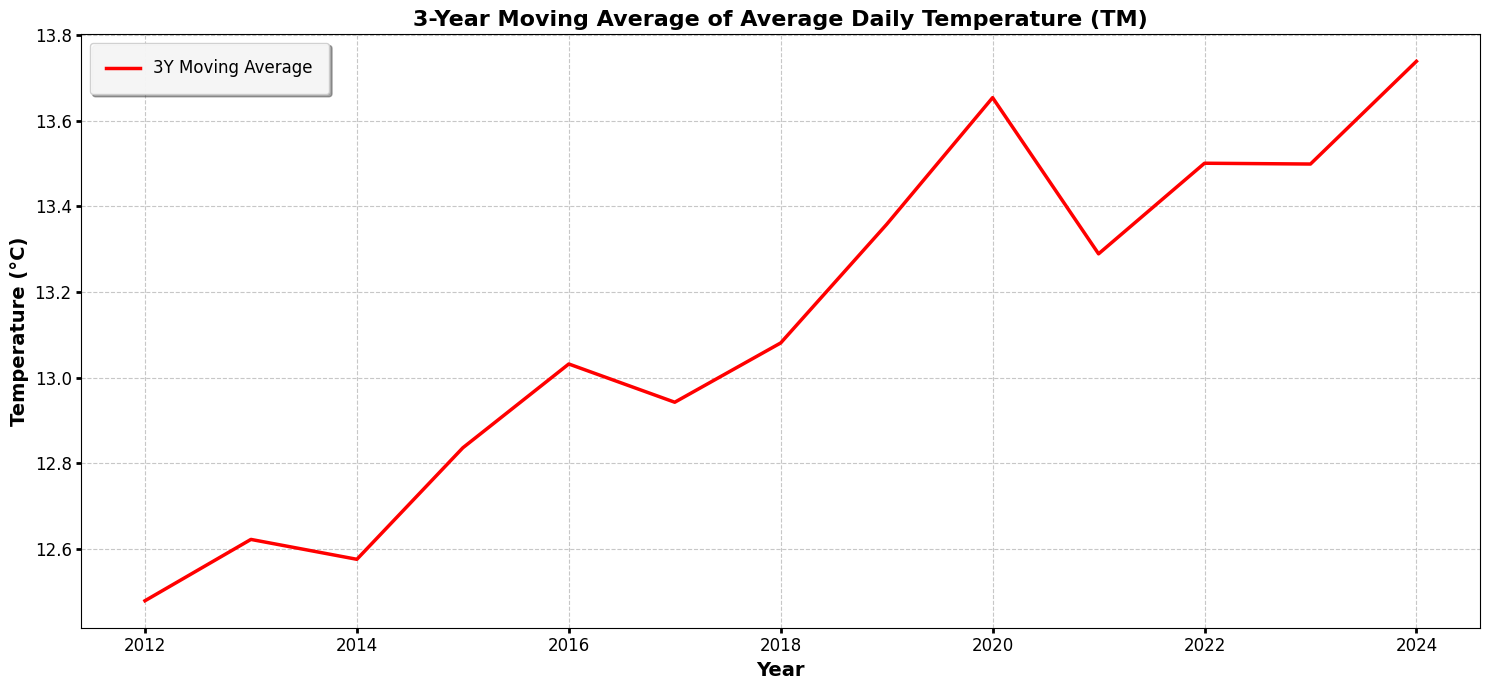

    year         TM   TM_ma_3y
10  2020  13.959290  13.654375
11  2021  12.520274  13.289261
12  2022  14.023562  13.501042
13  2023  13.953699  13.499178
14  2024  13.240710  13.739324
Temperature change over the last 12 years: 1.1176959353245017°C


In [66]:
import seaborn as sns



# Assuming df contains daily temperature data with 'TM' as temperature and 'date' as the index
df_paris['year'] = df_paris.index.year  # Extract the year from the 'date' index

# Calculate the average daily temperature for each year
year_avg = df_paris.groupby('year')['TM'].mean().reset_index()

# Compute the 3-year moving average
year_avg['TM_ma_3y'] = year_avg['TM'].rolling(3).mean()

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the 3-year moving average of yearly temperatures in red, bold line
sns.lineplot(data=year_avg, x='year', y='TM_ma_3y', label='3Y Moving Average', ax=ax, ci=None, color='red', linewidth=2.5)

# Customize the plot appearance
ax.set_xlabel('Year', fontsize=14, fontweight='bold')  # Bold x-axis label
ax.set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold')  # Bold y-axis label
ax.set_title('3-Year Moving Average of Average Daily Temperature (TM)', fontsize=16, fontweight='bold')  # Bold title

# Adding gridlines for better visualization
ax.grid(True, linestyle='--', alpha=0.7)

# Customize the tick parameters (optional)
ax.tick_params(axis='both', which='major', labelsize=12, width=2)

# Add a legend with a custom font size and bold font
plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, framealpha=0.9, shadow=True, borderpad=1)

# Display the plot
plt.tight_layout()
plt.show()

# Check for the last few values (optional)
print(year_avg.tail())

# Calculate the temperature change over the last 12 years (2010-2024)

temperature_change = year_avg['TM_ma_3y'].iloc[-1] - year_avg['TM_ma_3y'].iloc[3]  # Change from 2012 to 2024

print(f"Temperature change over the last 12 years: {temperature_change}°C")


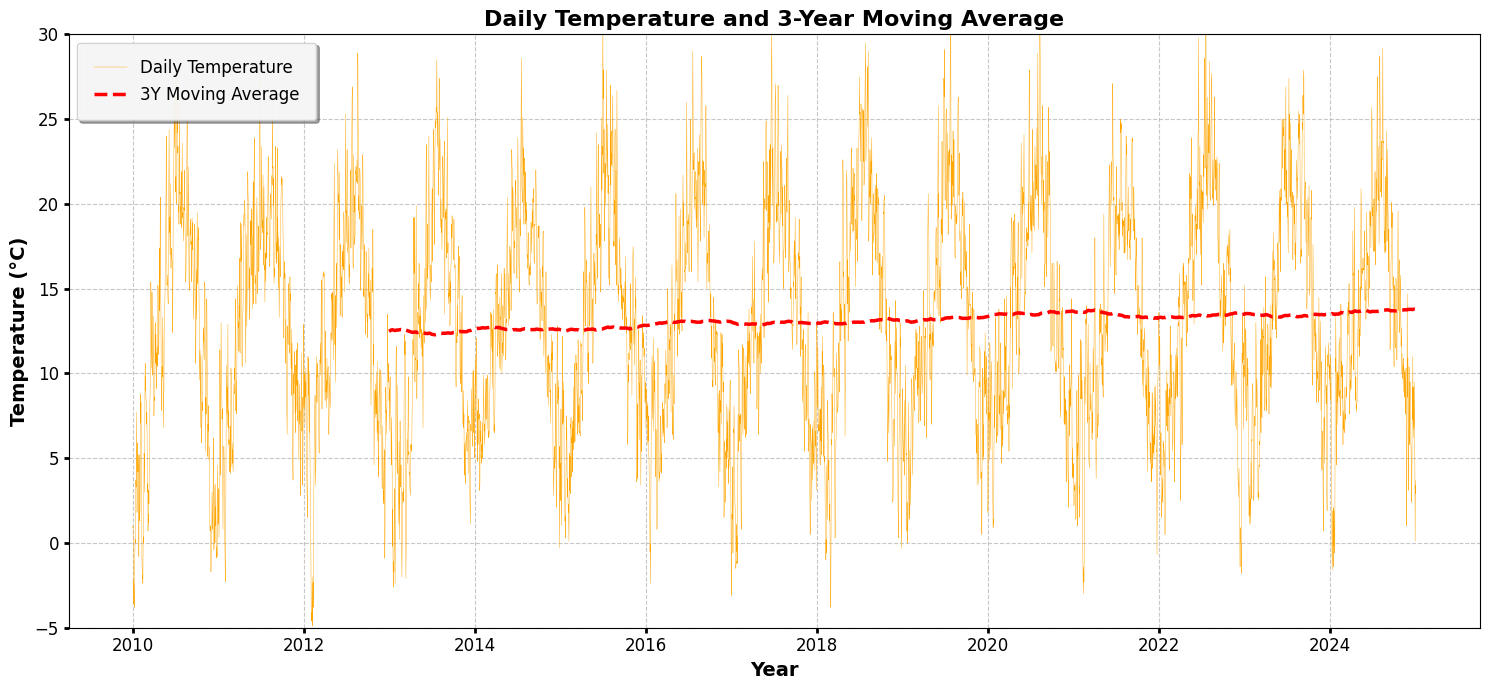

    year         TM   TM_ma_3y
10  2020  13.959290  13.654375
11  2021  12.520274  13.289261
12  2022  14.023562  13.501042
13  2023  13.953699  13.499178
14  2024  13.240710  13.739324
Temperature change over the last 12 years: 1.1176959353245017°C


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_paris contains daily temperature data with 'TM' as temperature and 'date' as the index

# Compute the 3-year moving average on the daily data
df_paris['TM_ma_3y'] = df_paris['TM'].rolling(3*365).mean()  # 3 years of daily data (365 days per year)

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the daily temperature (showing a subset of data for clarity)
sns.lineplot(data=df_paris.loc['2010':'2024'], x=df_paris.loc['2010':'2024'].index, y='TM', label='Daily Temperature', ax=ax, color='orange', linewidth=0.3)
ax.set_ylim(-5, 30)
# Plot the 3-year moving average of daily temperatures in red, bold line
sns.lineplot(data=df_paris.loc['2010':'2024'], x=df_paris.loc['2010':'2024'].index, y='TM_ma_3y', label='3Y Moving Average', ax=ax,linestyle='--', color='red', linewidth=2.5)

# Customize the plot appearance
ax.set_xlabel('Year', fontsize=14, fontweight='bold')  # Bold x-axis label
ax.set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold')  # Bold y-axis label
ax.set_title('Daily Temperature and 3-Year Moving Average', fontsize=16, fontweight='bold')  # Bold title

# Adding gridlines for better visualization
ax.grid(True, linestyle='--', alpha=0.7)

# Customize the tick parameters (optional)
ax.tick_params(axis='both', which='major', labelsize=12, width=2)

# Add a legend with a custom font size and bold font
plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, framealpha=0.9, shadow=True, borderpad=1)

# Display the plot
plt.tight_layout()
plt.show()
print(year_avg.tail())

# Calculate the temperature change over the last 12 years (2010-2024)

temperature_change = year_avg['TM_ma_3y'].iloc[-1] - year_avg['TM_ma_3y'].iloc[3]  # Change from 2012 to 2024

print(f"Temperature change over the last 12 years: {temperature_change}°C")


/tmp/ipykernel_7837/1383105296.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=year_avg, x=year_avg.index, y='TM_ma_10y', label='Yearly 10Y Moving Average', ax=ax, ci=None, color='b')


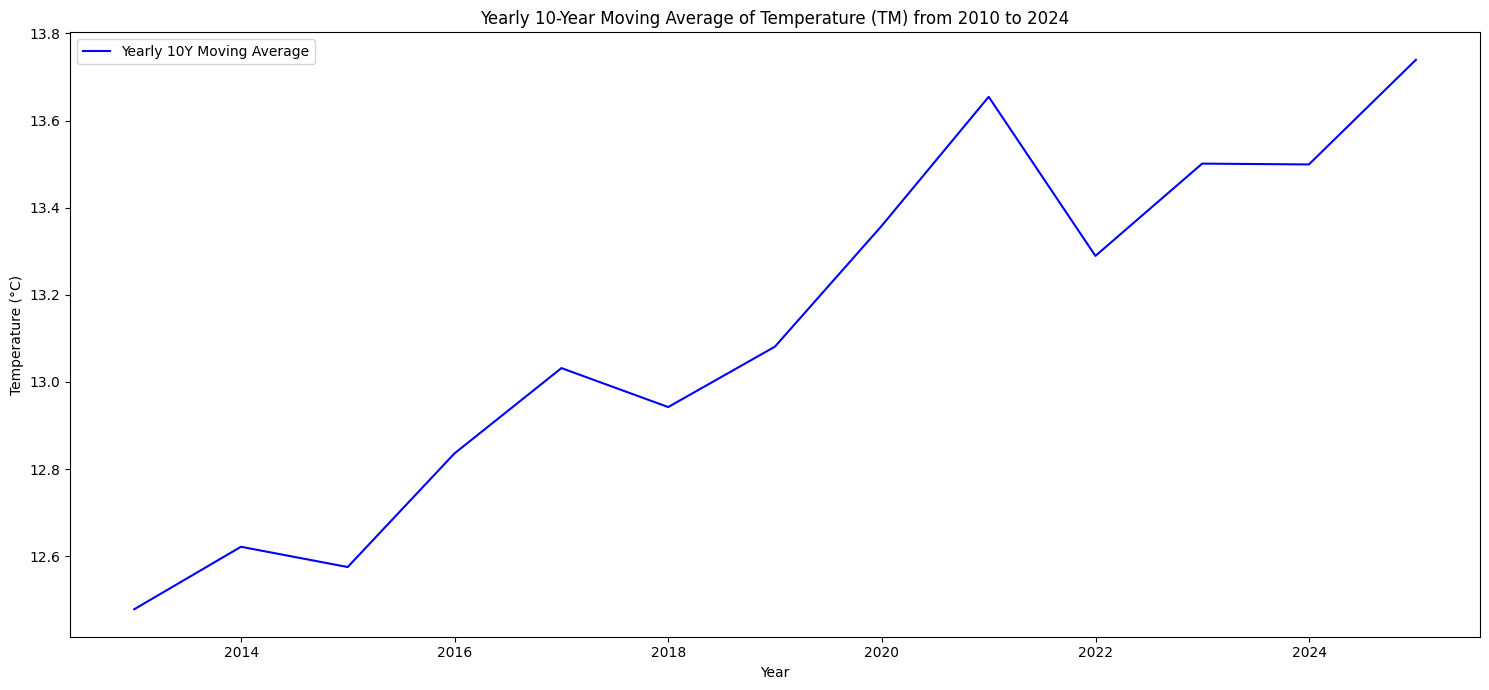

Temperature change over the last decade (2010-2024): 1.1641799535893433°C


In [ ]:


# Calculate the yearly moving average for temperature
# Resample the data to yearly average and then apply the moving average
year_avg = df_paris.resample('Y').mean()  # Resample to get yearly averages
year_avg['TM_ma_10y'] = year_avg['TM'].rolling(3).mean()  # 10-year rolling average of the yearly data

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the yearly moving average of daily temperatures from 2010 to 2024
sns.lineplot(data=year_avg, x=year_avg.index, y='TM_ma_10y', label='Yearly 10Y Moving Average', ax=ax, ci=None, color='b')

# Label the axes and title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Yearly 10-Year Moving Average of Temperature (TM) from 2010 to 2024')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the temperature change over the last decade (2014-2024)
# The change is from 2014 (10 years ago) to 2024
temperature_change = year_avg['TM_ma_10y'].iloc[-1] - year_avg['TM_ma_10y'].iloc[-11]  # Change from 2014 to 2024
print(f"Temperature change over the last decade (2010-2024): {temperature_change}°C")


In [110]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant features
data_selected = df_paris[['TN', 'TX', 'TM', 'TNTXM', 'TAMPLI', 'TNSOL', 'RR']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_selected_normalized = scaler.fit_transform(data_selected)

# Parameters
n_steps = 365  # Example: 365 days for the input sequence (1 year)
fut_hours = 1  # Predict the next day's temperature (1 day ahead)
out_feat_index = data_selected.columns.get_loc('TN')  # Assuming 'TN' is the temperature you want to predict

# Sequence generation function
def create_sequences(input_data, n_steps, fut_hours, out_feat_index):
    X, y = [], []
    for i in range(len(input_data) - n_steps - fut_hours):
        end_ix = i + n_steps
        out_end_ix = end_ix + fut_hours
        if out_end_ix > len(input_data):
            break
        seq_x, seq_y = input_data[i:end_ix, :], input_data[out_end_ix - 1, out_feat_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(data_selected_normalized, n_steps, fut_hours, out_feat_index)

# Split the data into training, validation, and testing sets
SPLIT = 0.8
train_size = int(len(data_selected_normalized) * SPLIT)
val_size = int(len(data_selected_normalized) * (1 - SPLIT) // 2)
test_size = len(data_selected_normalized) - train_size - val_size

# Split the normalized data into train, validation, and test sets
data_train = data_selected_normalized[:train_size]
data_val = data_selected_normalized[train_size:train_size + val_size]
data_test = data_selected_normalized[-test_size:]

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(data_train, n_steps, fut_hours, out_feat_index)
X_val, y_val = create_sequences(data_val, n_steps, fut_hours, out_feat_index)
X_test, y_test = create_sequences(data_test, n_steps, fut_hours, out_feat_index)

# Print the shapes of the sequences
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (4017, 365, 7)
y_train shape: (4017,)
X_val shape: (181, 365, 7)
y_val shape: (181,)
X_test shape: (183, 365, 7)
y_test shape: (183,)


In [111]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# LSTM model definition
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Predicting a single value (temperature)
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Model input shape (n_steps, number of features)
input_shape = (X_train.shape[1], X_train.shape[2])

# Build the model
model = build_lstm_model(input_shape)

# Print the model summary
model.summary()


2025-04-02 14:00:38.160060: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-02 14:00:38.195653: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 14:00:38.452331: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 14:00:38.647250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743595238.839151    7837 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743595238.89

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 365, 64)        │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 365, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 63s 498ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 49s 388ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 3/100
 64/126 ━━━━━━━━━━━━━━━━━━━━ 26s 420ms/step - loss: 0.0047

KeyboardInterrupt: 

In [112]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 73s 556ms/step - loss: 0.0609 - val_loss: 0.0072
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 70s 556ms/step - loss: 0.0140 - val_loss: 0.0068
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 68s 540ms/step - loss: 0.0131 - val_loss: 0.0065
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 70s 555ms/step - loss: 0.0120 - val_loss: 0.0063
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 64s 508ms/step - loss: 0.0111 - val_loss: 0.0074
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 78s 477ms/step - loss: 0.0109 - val_loss: 0.0060
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 70s 553ms/step - loss: 0.0099 - val_loss: 0.0058
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 72s 571ms/step - loss: 0.0096 - val_loss: 0.0055
Epoch 9/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 67s 529ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 10/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 55s 438ms/step - loss: 0.0082 - val_loss: 0.0051
Epoch 11/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 55s 434ms/step - loss: 0.0077 - val_loss: 0.0049
Epoch 12/20
126/126

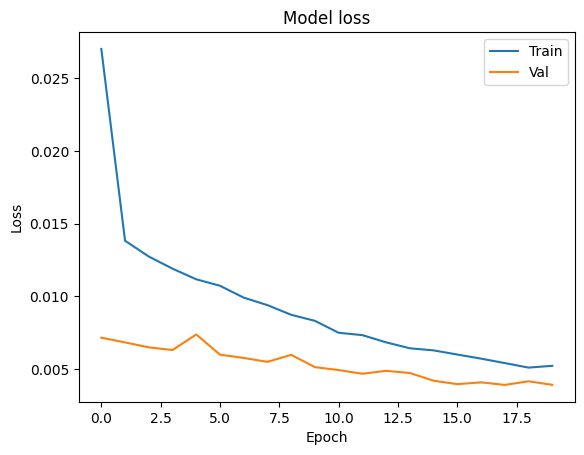

In [114]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step


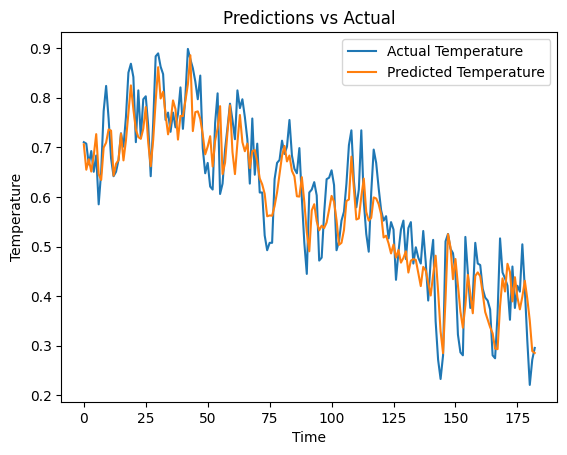

In [115]:
y_pred = model.predict(X_test)

# Plot predictions vs actual values
plt.plot(y_test, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title('Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [164]:
y_pred[0]

array([0.7060841], dtype=float32)

In [165]:
print(df_paris['TN'].describe())  # See min/max values

count    5479.000000
mean        9.649334
std         5.657848
min        -8.500000
25%         5.500000
50%         9.700000
75%        14.100000
max        25.000000
Name: TN, dtype: float64


In [166]:
print(scaler.data_min_)  # Min values of each feature
print(scaler.data_max_)  # Max values of each feature


[ -8.5  -2.7  -4.9  -4.7   0.4 -10.6   0. ]
[25.  42.6 34.  33.8 18.9 21.6 78.2]


In [ ]:
# Create a placeholder array with the same number of rows but 7 columns (full feature set)
y_pred_full = np.zeros((y_pred.shape[0], 7))  # 7 features total
y_pred_full[:, 0] = y_pred[:, 0]  # Place the 'TN' predictions in the correct column

# Inverse transform
y_pred_real = scaler.inverse_transform(y_pred_full)

# Extract the actual TN values
y_pred_TN = y_pred_real[:, 0]  # Only 'TN' values
y_pred_TN

array([15.15381643, 13.4420318 , 14.14969397, 13.31291759, 14.39466393,
       15.8434459 , 13.13523829, 12.74316934, 14.93176723, 15.27096009,
       16.16413882, 16.07922879, 13.04142272, 13.83702999, 14.08680016,
       15.87451342, 14.06908694, 15.4186002 , 17.30662248, 19.13604397,
       17.52326047, 16.14939678, 15.64179754, 15.52654082, 16.21135211,
       17.67257985, 15.24723664, 13.67377925, 15.45586166, 18.07543129,
       20.36494321, 18.25042295, 18.70609656, 17.16073152, 15.83010358,
       16.64611769, 18.12278634, 17.53296471, 15.47397423, 17.07928586,
       17.05724967, 18.09568238, 19.21437669, 21.17126706, 16.0483849 ,
       17.32700536, 17.38244927, 16.87436083, 15.82136577, 14.48024487,
       15.00322711, 15.70099735, 13.65443069, 15.39032215, 16.2402252 ,
       17.73333514, 13.14506632, 13.90872151, 16.00449222, 17.79140878,
       14.63555253, 13.14260831, 15.27214617, 17.13632119, 15.30164623,
       14.68767983, 15.20364547, 13.54675165, 14.68262005, 14.77

In [168]:
# Assuming your normalized data ends on 31-12-2024 and n_steps is 365
# Extract the last 365 days from the normalized dataset
last_sequence = data_selected_normalized[-n_steps:]  # shape: (365, num_features)

# Reshape to add the batch dimension: (1, n_steps, num_features)
last_sequence = last_sequence.reshape((1, n_steps, data_selected_normalized.shape[1]))

# Predict the normalized temperature for the next day (01-01-2025)
predicted_normalized = model.predict(last_sequence)  # shape: (1, 1)

# To inverse transform, create a dummy array that mimics the full feature vector
dummy = np.zeros((1, data_selected.shape[1]))
dummy[0, out_feat_index] = predicted_normalized[0, 0]

# Inverse transform to get the original temperature scale
predicted_temp = scaler.inverse_transform(dummy)[0, out_feat_index]

print(f"Predicted Temperature for 01-01-2025: {predicted_temp:.2f}°C")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted Temperature for 01-01-2025: 1.47°C


In [169]:
df_2024[df_2024['date'] == '2025-01-01']
#  Paris : TN=3.9°C

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
366,75106001,LUXEMBOURG,48.844667,2.333833,46,20250101,13.3,1.0,4.6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-01
820,75107005,TOUR EIFFEL,48.858333,2.294500,330,20250101,NaN,NaN,2.2,1.0,...,NaN,24.8,1.0,NaN,NaN,2321.0,9.0,NaN,NaN,2025-01-01
1274,75110001,LARIBOISIERE,48.882833,2.352000,55,20250101,15.3,1.0,4.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-01
1728,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20250101,12.9,1.0,4.0,1.0,...,NaN,16.8,1.0,NaN,NaN,2355.0,9.0,327.0,9.0,2025-01-01
2182,75114007,PARIS-MONTSOURIS-DOUBLE,48.821667,2.337833,75,20250101,NaN,NaN,3.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-01
2636,75116008,LONGCHAMP,48.854833,2.233667,27,20250101,14.0,1.0,4.5,1.0,...,NaN,14.8,1.0,NaN,NaN,2036.0,9.0,NaN,NaN,2025-01-01


In [170]:
df_2024[df_2024['date'] == '2024-12-31']
# TN=1.1°C

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
365,75106001,LUXEMBOURG,48.844667,2.333833,46,20241231,0.0,1.0,1.4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31
819,75107005,TOUR EIFFEL,48.858333,2.294500,330,20241231,NaN,NaN,-0.7,1.0,...,NaN,16.6,1.0,NaN,NaN,2044.0,9.0,NaN,NaN,2024-12-31
1273,75110001,LARIBOISIERE,48.882833,2.352000,55,20241231,0.0,1.0,1.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31
1727,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20241231,0.0,1.0,1.1,1.0,...,NaN,11.4,1.0,NaN,NaN,2149.0,9.0,14.0,9.0,2024-12-31
2181,75114007,PARIS-MONTSOURIS-DOUBLE,48.821667,2.337833,75,20241231,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31
2635,75116008,LONGCHAMP,48.854833,2.233667,27,20241231,0.0,1.0,1.3,1.0,...,NaN,9.7,1.0,NaN,NaN,2119.0,9.0,NaN,NaN,2024-12-31


In [174]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assume y_test and y_pred are your actual and predicted values
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


Mean Absolute Error (MAE): 0.049
Root Mean Squared Error (RMSE): 0.060
